Train shape: (50000, 3073)
Test shape: (10000, 3073)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,805,450 (14.52 MB)

 Trainable params: 3,805,450 (14.52 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.3141 - loss: 1.8873 - val_accuracy: 0.3740 - val_loss: 1.7589
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.3908 - loss: 1.6892 - val_accuracy: 0.3952 - val_loss: 1.6644
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.4268 - loss: 1.5999 - val_accuracy: 0.4354 - val_loss: 1.5773
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.4456 - loss: 1.5404 - val_accuracy: 0.4288 - val_loss: 1.5704
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.4635 - loss: 1.4929 - val_accuracy: 0.4514 - val_loss: 1.5133
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.4766 - loss: 1.4580 - val_accuracy: 0.4744 - val_loss: 1.4776
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.4907 - loss: 1.4216 - val_accuracy: 0.4642 - val_loss: 1.5288
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.5015 - loss: 1.3900 - 

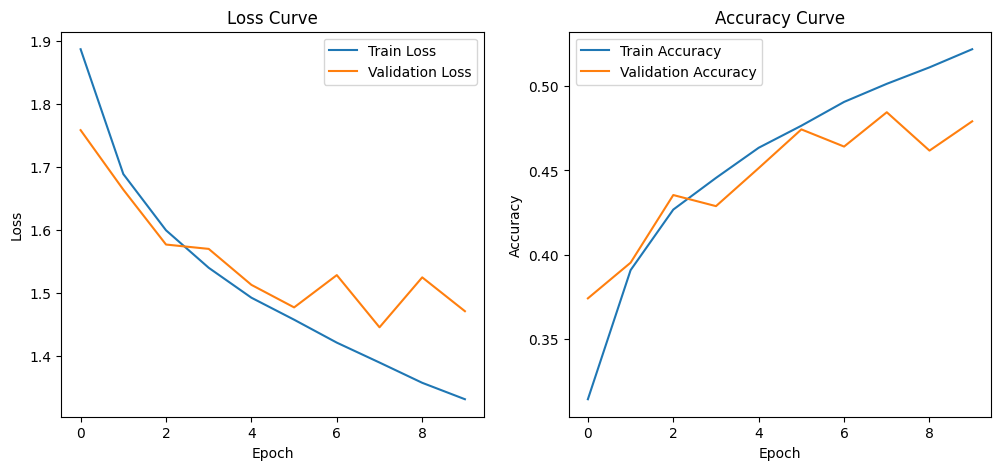

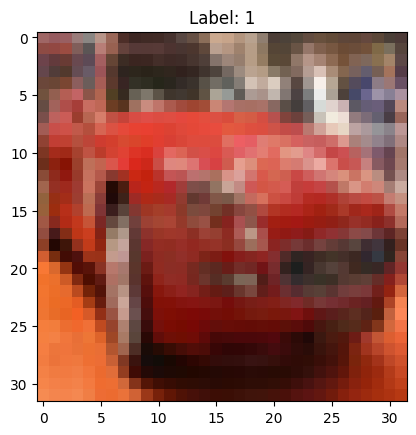

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


train_path = "/Users/akshay/Downloads/demo_dl/datasets1/CIFR(Ass2&3)/train_data.csv"
test_path  = "/Users/akshay/Downloads/demo_dl/datasets1/CIFR(Ass2&3)/test_data.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# label is LAST column
y_train = train_df.iloc[:, -1].values
x_train = train_df.iloc[:, :-1].values

y_test = test_df.iloc[:, -1].values
x_test = test_df.iloc[:, :-1].values

# Normalize pixels
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0


# Flattened image dimension
input_dim = 32 * 32 * 3

model = models.Sequential([
    tf.keras.Input(shape=(input_dim,)),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


# d. Train the model

history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    shuffle=True
)



# e. Evaluate model

test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest Accuracy:", test_acc)
print("Test Loss:", test_loss)


# f. Plot Loss and Accuracy

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()


# sample image
img = x_train[5].reshape(32, 32, 3)
plt.imshow(img)
plt.title(f"Label: {y_train[5]}")
plt.show()